In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.autograd import Variable

In [14]:
num_data = 1000
num_epoch = 1000
noise = init.normal(torch.FloatTensor(num_data, 1), std=1)
x = init.uniform(torch.Tensor(num_data, 1), -10, 10)

y = 2*x+3
y_noise = y+noise

C:\Users\SHM\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SHM\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  after removing the cwd from sys.path.


In [15]:
model = nn.Linear(1, 1)
output = model(Variable(x))

loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [16]:
loss_arr = []
label = Variable(y_noise)
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(Variable(x))
    
    loss = loss_func(output, label)
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        print(loss)
#     print(loss.data.numpy())
    loss_arr.append(loss.data.numpy())

tensor(233.3512, grad_fn=<MseLossBackward>)
tensor(10.2438, grad_fn=<MseLossBackward>)
tensor(7.1768, grad_fn=<MseLossBackward>)
tensor(5.1287, grad_fn=<MseLossBackward>)
tensor(3.7610, grad_fn=<MseLossBackward>)
tensor(2.8478, grad_fn=<MseLossBackward>)
tensor(2.2379, grad_fn=<MseLossBackward>)
tensor(1.8307, grad_fn=<MseLossBackward>)
tensor(1.5588, grad_fn=<MseLossBackward>)
tensor(1.3772, grad_fn=<MseLossBackward>)
tensor(1.2559, grad_fn=<MseLossBackward>)
tensor(1.1749, grad_fn=<MseLossBackward>)
tensor(1.1208, grad_fn=<MseLossBackward>)
tensor(1.0847, grad_fn=<MseLossBackward>)
tensor(1.0606, grad_fn=<MseLossBackward>)
tensor(1.0445, grad_fn=<MseLossBackward>)
tensor(1.0338, grad_fn=<MseLossBackward>)
tensor(1.0266, grad_fn=<MseLossBackward>)
tensor(1.0218, grad_fn=<MseLossBackward>)
tensor(1.0186, grad_fn=<MseLossBackward>)
tensor(1.0165, grad_fn=<MseLossBackward>)
tensor(1.0150, grad_fn=<MseLossBackward>)
tensor(1.0141, grad_fn=<MseLossBackward>)
tensor(1.0134, grad_fn=<MseLoss

In [17]:
param_list = list(model.parameters())
print(param_list[0].data, param_list[1].data)

tensor([[1.9951]]) tensor([3.0281])


In [18]:
import os
from glob import glob

import torch
from torchvision import datasets, transforms

## Data Loader 부르기
파이토치는 DataLoader를 불러 model에 넣음

In [19]:
batch_size = 32
test_batch_size = 32

In [23]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download=True, 
                 transform=transforms.Compose([
                     transforms.ToTensor(),
                     transforms.Normalize(mean=(0.5,), std=(0.5,))
                 ])),
    batch_size=batch_size,
    shuffle=True)

100%|███████████████████████████████████████████████████████████████████▊| 9887744/9912422 [00:45<00:00, 361085.34it/s]

Extracting dataset/MNIST\raw\train-images-idx3-ubyte.gz to dataset/MNIST\raw



0it [00:00, ?it/s]
 57%|█████████████████████████████████████████▍                               | 16384/28881 [00:01<00:00, 59148.18it/s]
32768it [00:01, 31999.97it/s]                                                                                          

Extracting dataset/MNIST\raw\train-labels-idx1-ubyte.gz to dataset/MNIST\raw



0it [00:00, ?it/s]
 75%|███████████████████████████████████████████████████▊                 | 1236992/1648877 [00:12<00:04, 82943.61it/s]
9920512it [01:00, 361085.34it/s]                                                                                       
 99%|███████████████████████████████████████████████████████████████████▌| 1638400/1648877 [00:16<00:00, 111737.78it/s]

Extracting dataset/MNIST\raw\t10k-images-idx3-ubyte.gz to dataset/MNIST\raw




0it [00:00, ?it/s]

  0%|                                                                                         | 0/4542 [00:00<?, ?it/s]

8192it [00:00, 10394.49it/s]                                                                                           

Extracting dataset/MNIST\raw\t10k-labels-idx1-ubyte.gz to dataset/MNIST\raw
Processing...
Done!



1654784it [00:32, 111737.78it/s]                                                                                       

In [25]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=False, 
                  transform = transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize((0.5,), (0.5))
                  ])),
    batch_size = test_batch_size,
    shuffle=True)

첫번째 iteration에서 나오는 데이터 확인

In [26]:
images, labels = next(iter(train_loader))
images.shape

torch.Size([32, 1, 28, 28])

In [27]:
labels.shape

torch.Size([32])

PyTorch는 텐서와 다르게 [Batch Size, Channel, Height, Wdith]임

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
images[0].shape

torch.Size([1, 28, 28])

In [30]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [31]:
image = torch_image.numpy()

In [32]:
image.shape

(28, 28)

In [33]:
label = labels[0].numpy()
label.shape

()

In [34]:
label

array(7, dtype=int64)

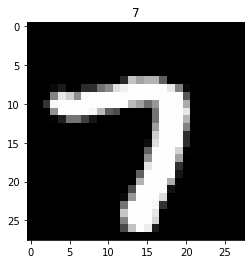

In [36]:
plt.title(label)
plt.imshow(image,'gray')